# <font color='brown'>Diwali Sales Analysis

## <font color='brown'>Importing required libraries</font>

In [1]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

## <font color='brown'> Extract and Load Dataset

In [2]:
diwali_sales = pd.read_csv("Diwali Sales Data.csv",encoding = "unicode_escape")
print(diwali_sales.head())
print(diwali_sales.info())

   User_ID  Cust_name Product_ID Gender Age Group  Age  Marital_Status  \
0  1002903  Sanskriti  P00125942      F     26-35   28               0   
1  1000732     Kartik  P00110942      F     26-35   35               1   
2  1001990      Bindu  P00118542      F     26-35   35               1   
3  1001425     Sudevi  P00237842      M      0-17   16               0   
4  1000588       Joni  P00057942      M     26-35   28               1   

            State      Zone       Occupation Product_Category  Orders  \
0     Maharashtra   Western       Healthcare             Auto       1   
1  Andhra Pradesh  Southern             Govt             Auto       3   
2   Uttar Pradesh   Central       Automobile             Auto       3   
3       Karnataka  Southern     Construction             Auto       2   
4         Gujarat   Western  Food Processing             Auto       2   

    Amount  Status  unnamed1  
0  23952.0     NaN       NaN  
1  23934.0     NaN       NaN  
2  23924.0     NaN     

## <font color='brown'> Data Cleaning

### <font color='orange'> Dropping Unwanted Columns

<font color='green'> In our analysis, we are not using the columns 'Cust_name','unnamed1','Status'</font>

In [3]:
diwali_sales.drop(['Cust_name','unnamed1','Status'],axis=1,inplace=True)

### <font color='orange'> Handling Empty Values

In [4]:
pd.isnull(diwali_sales).sum()

User_ID              0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

<font color='green'> None of the columns have null values except 'Amount', as 12 is very less when compared to total number of rows 11251, we can drop all the rows </font>

In [5]:
diwali_sales.dropna(inplace=True)

### <font color='orange'> Helper Function for pie chart </font>

<font color='green'> Function that helps in showing the exact values instead of percentage inside a pie chart </font>

In [6]:
def pie_chart_absolute_value(value,total):
  return '{:.0f}'.format(value*total/100)

## <font color='brown'> Data Analysis

### <font color='orange'>Age Group

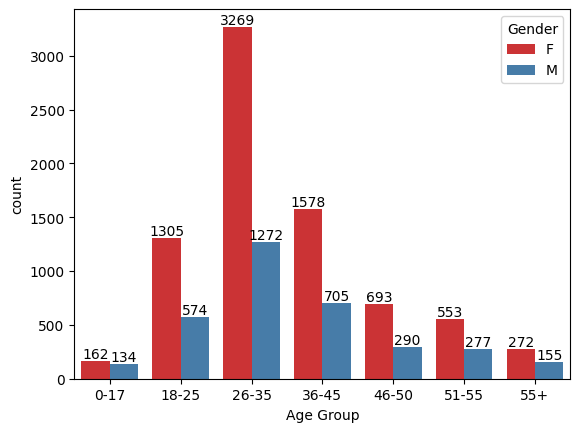

In [7]:
cp = sb.countplot(x='Age Group',hue='Gender',data=diwali_sales,order=diwali_sales['Age Group'].sort_values(),palette=sb.color_palette('Set1',2))
for bars in cp.containers:
  cp.bar_label(bars)

<font color='green'> People of age group 26-35 have made the most number of orders, almost 50% of whole orders. Out of the 26-35 age group majority customers are Female.

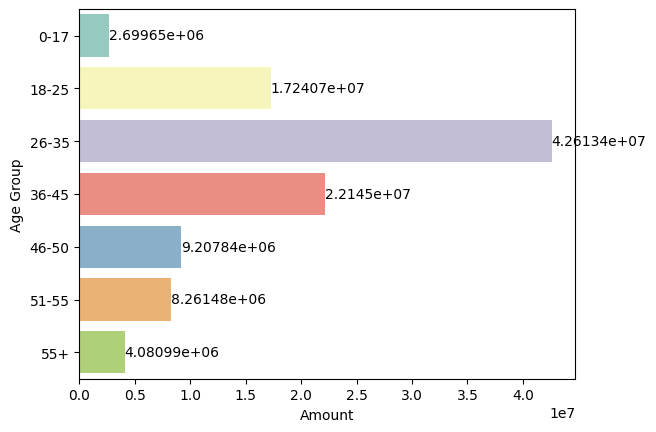

In [8]:
sales_gen = diwali_sales.groupby(['Age Group'], as_index=False)['Amount'].sum().sort_values(by='Age Group')
sales_gen
cp = sb.barplot(y='Age Group',hue='Age Group',x='Amount',data=sales_gen,palette=sb.color_palette('Set3',7))
for bars in cp.containers:
  cp.bar_label(bars)

<font color='green'> People of age group 26-35 have contibuted most of the amount in the sales, almost 50% of whole sales amount.

### <font color='orange'>Occupation

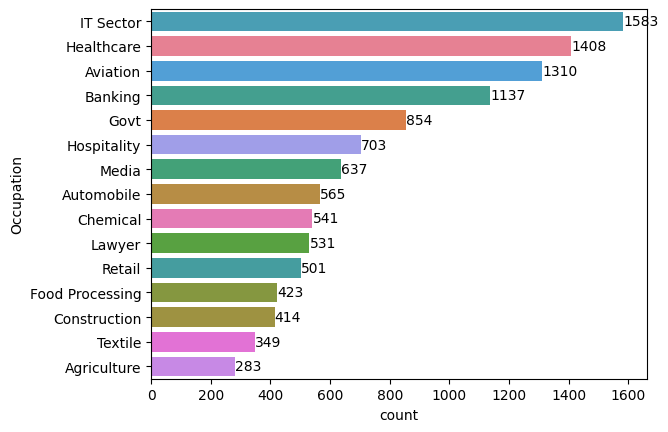

In [9]:
ax = sb.countplot(data = diwali_sales,y ='Occupation',hue ='Occupation',palette=sb.color_palette('husl',15),order = diwali_sales['Occupation'].value_counts().index)

for bars in ax.containers:
    ax.bar_label(bars)

<font color='green'> People of occupation IT have contibuted most of the orders in the sales.

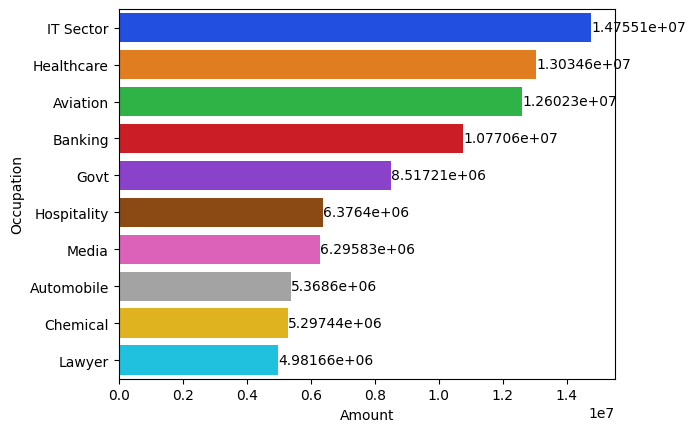

In [10]:
sales_gen = diwali_sales.groupby(['Occupation'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
cp = sb.barplot(hue='Occupation',y='Occupation',x='Amount',data=sales_gen,palette=sb.color_palette('bright',10))
for bars in cp.containers:
  cp.bar_label(bars)

<font color='green'> People of occupation IT have contibuted most of the amount in the sales, followed by Healthcare and Aviation.

### <font color='orange'>Gender

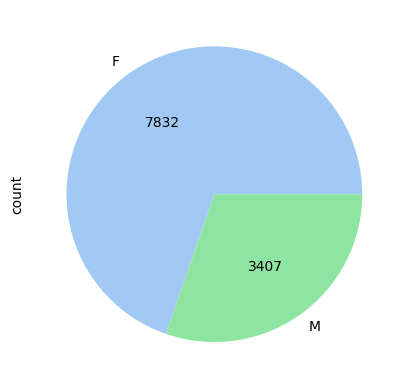

In [11]:
diwali_sales['Gender'].value_counts().plot(kind='pie',
                                           autopct=lambda x: pie_chart_absolute_value(x,diwali_sales['Gender'].count()),
                                           colors=sb.color_palette("pastel6") )
plt.show()

<font color='green'> Majority of orders are from females, showcasing that the target audience are mostly female.

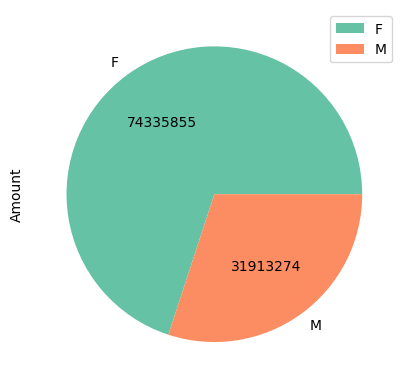

In [12]:
sales_gen = diwali_sales.groupby(['Gender'], as_index=False)['Amount'].sum()
sales_gen.plot(kind='pie',labels=sales_gen['Gender'],y='Amount',
               autopct=lambda x: pie_chart_absolute_value(x,sales_gen['Amount'].sum()),
               colors=sb.color_palette('Set2'))
plt.show()

<font color='green'> Similar to orders, majority of income amount is from females.

### <font color='orange'>Marital Status

<ipython-input-13-42e468d54980>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  cp.set_xticklabels(['Unmarried', 'Married']);


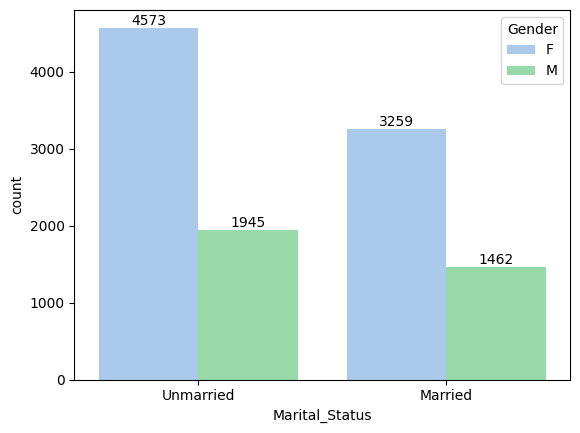

In [13]:
cp = sb.countplot(x='Marital_Status',hue='Gender',data=diwali_sales,order=diwali_sales['Marital_Status'].sort_values(),palette=sb.color_palette('pastel6',2))
for bars in cp.containers:
  cp.bar_label(bars)
cp.set_xticklabels(['Unmarried', 'Married']);

<font color='green'> Unmarried customers are more, but not dominating compared to married ones. So the target audience are both married and unmarried ones.

### <font color='orange'>Product Category

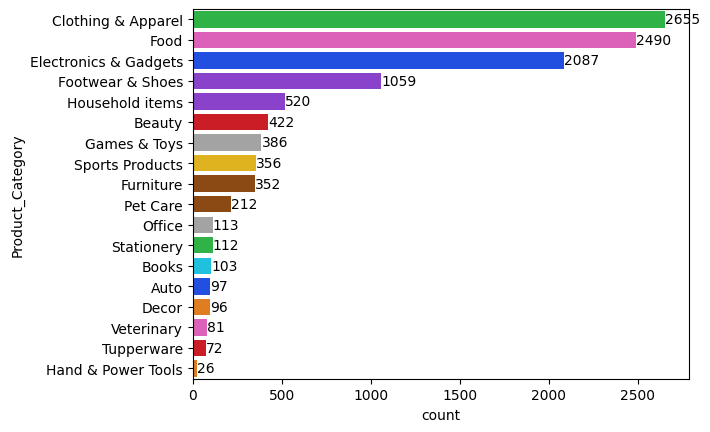

In [14]:
ax = sb.countplot(data = diwali_sales,hue = 'Product_Category', y = 'Product_Category',
                  palette=sb.color_palette('bright',18),
                  order = diwali_sales['Product_Category'].value_counts().index)
for bars in ax.containers:
    ax.bar_label(bars)

<font color='green'> Majority orders almost 80% are from clothing, food and electronics. So the stores can target more in these categories.

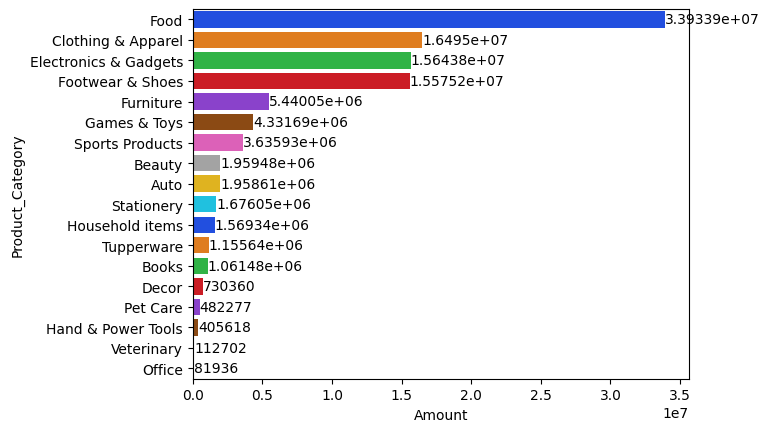

In [15]:
sales_gen = diwali_sales.groupby(['Product_Category'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False)
cp = sb.barplot(hue='Product_Category',y='Product_Category',x='Amount',
                data=sales_gen,
                palette=sb.color_palette("bright",18))
for bars in cp.containers:
  cp.bar_label(bars)

<font color='green'> Similar to orders Clothing, food and electronics are leading in the income generated, but here food is very dominating when compared to other two.

### <font color='orange'>State

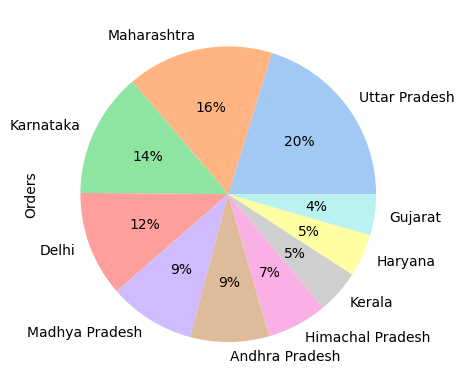

In [16]:
sales_gen = diwali_sales.groupby(['State'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sales_gen.plot(kind='pie',labels=sales_gen['State'],y='Orders',
               autopct='%.0f%%',legend=False,
               colors=sb.color_palette('pastel',10))
plt.show()

<font color='green'> Half of the orders are from Uttar Pradesh, Maharashtra and Karnataka. Remaining all states have combined to from the other 50%

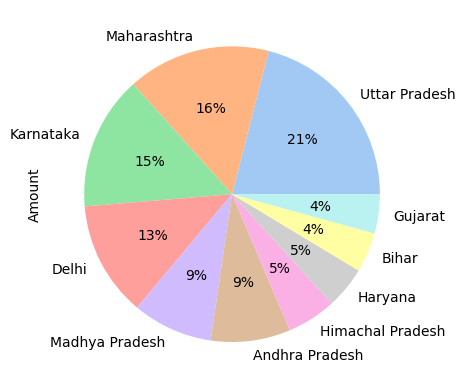

In [17]:
sales_gen = diwali_sales.groupby(['State'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sales_gen.plot(kind='pie',labels=sales_gen['State'],y='Amount',
               autopct='%.0f%%',legend=False,
               colors=sb.color_palette('pastel',10))
plt.show()

<font color='green'> HSimilar to orders, more than half of the income is from Uttar Pradesh, Maharashtra and Karnataka. Remaining all states have combined to from the other 50%

### <font color='orange'>Product ID

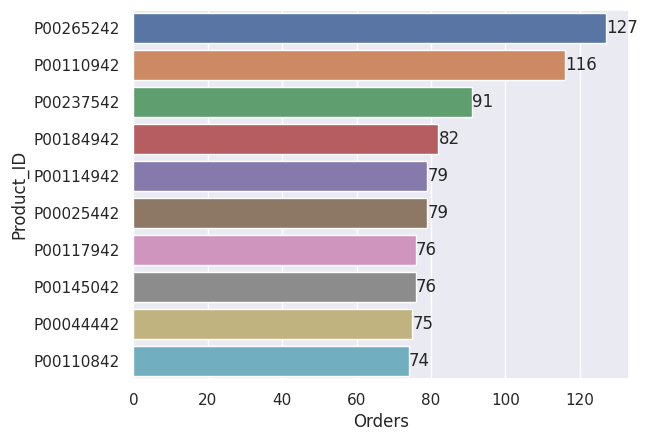

In [18]:
sales_gen = diwali_sales.groupby(['Product_ID'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False).head(10)
sales_gen
sb.set()
cp = sb.barplot(hue='Product_ID',y='Product_ID',x='Orders',data=sales_gen)
for bars in cp.containers:
  cp.bar_label(bars)

<font color='green'> The top 2 Product IDs having more number of orders are P00265242 and P00110942.

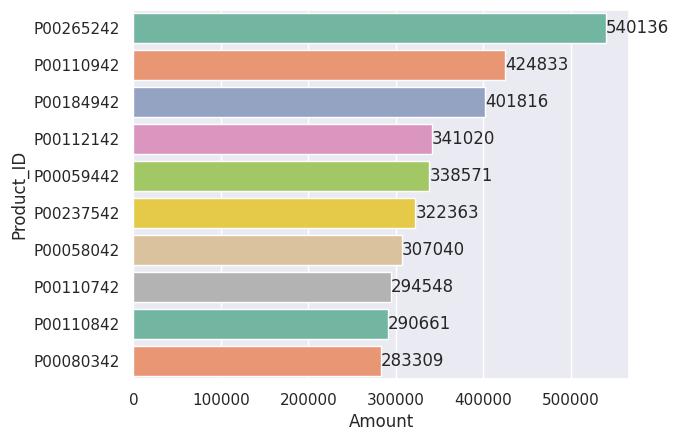

In [19]:
sales_gen = diwali_sales.groupby(['Product_ID'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sales_gen
sb.set()
cp = sb.barplot(hue='Product_ID',y='Product_ID',x='Amount',data=sales_gen,palette=sb.color_palette("Set2",10))
for bars in cp.containers:
  cp.bar_label(bars)

<font color='green'>  The top 3 Product IDs contributinh more amount are P00265242, P00110942 and P00184942.

### <font color='orange'>Zone

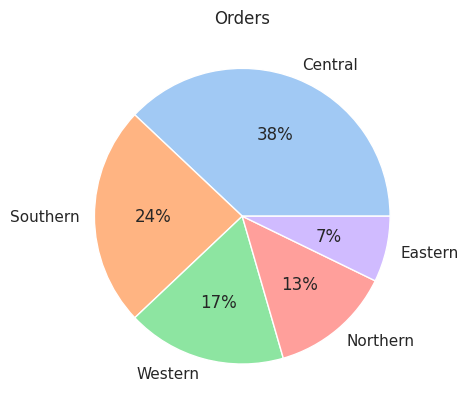

In [20]:
sales_gen = diwali_sales.groupby(['Zone'], as_index=False)['Orders'].sum().sort_values(by='Orders', ascending=False)
sales_gen.plot(kind='pie',labels=sales_gen['Zone'],y='Orders',
               autopct='%.0f%%',legend=False,
               colors=sb.color_palette('pastel'),ylabel="",title="Orders")
plt.show()

<font color='green'> More than half of orders are from central and southern zone states as we have seen in the state wise analysis.

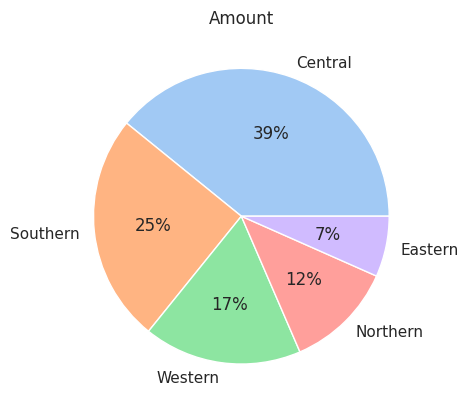

In [21]:
sales_gen = diwali_sales.groupby(['Zone'], as_index=False)['Amount'].sum().sort_values(by='Amount', ascending=False).head(10)
sales_gen.plot(kind='pie',labels=sales_gen['Zone'],y='Amount',
               autopct='%.0f%%',legend=False,
               colors=sb.color_palette('pastel',10),ylabel="",title="Amount")
plt.show()

<font color='green'>Similar to orders, more than half of income is from central and southern states.